In [1]:
from bs4 import BeautifulSoup

In [2]:
import requests

#for software category
#url = 'https://www.sih.gov.in/sih2020PS/QWxs/U29mdHdhcmU=/QWxs/QWxs'

#for all categories
url = 'https://www.sih.gov.in/sih2020PS'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
pagination = soup.find("ul", {"class":"pagination"}).find_all("li")
print(pagination[-2])
last_page_count = int(pagination[-2].find("a").text)
page_list = []
for i in range(1, last_page_count+1):
    page = requests.get(url + '?page=' + str(i))
    page_list.append(page)
    print(f'page no. {i} is being scraped..')
print(len(page_list))

<li><a href="https://www.sih.gov.in/sih2020PS?page=36">36</a></li>
page no. 1 is being scraped..
page no. 2 is being scraped..
page no. 3 is being scraped..
page no. 4 is being scraped..
page no. 5 is being scraped..
page no. 6 is being scraped..
page no. 7 is being scraped..
page no. 8 is being scraped..
page no. 9 is being scraped..
page no. 10 is being scraped..
page no. 11 is being scraped..
page no. 12 is being scraped..
page no. 13 is being scraped..
page no. 14 is being scraped..
page no. 15 is being scraped..
page no. 16 is being scraped..
page no. 17 is being scraped..
page no. 18 is being scraped..
page no. 19 is being scraped..
page no. 20 is being scraped..
page no. 21 is being scraped..
page no. 22 is being scraped..
page no. 23 is being scraped..
page no. 24 is being scraped..
page no. 25 is being scraped..
page no. 26 is being scraped..
page no. 27 is being scraped..
page no. 28 is being scraped..
page no. 29 is being scraped..
page no. 30 is being scraped..
page no. 31 

In [3]:
import pprint

In [4]:
problem_list = []

In [5]:
for page in page_list:

    soup = BeautifulSoup(page.content, "html.parser")

    data_table = soup.find(id="table_id")
    rows = data_table.find("tbody").find_all("tr", recursive=False)

    for row in rows:
        row_data = {}
    
        td = row.find_all("td", recursive = False)

        row_data['organization'] = td[1].text.strip()
        row_data['category'] = td[3].text.strip()
        row_data['ps_number'] = td[4].text.strip()
        row_data['idea_count'] = td[5].text.strip()
        row_data['domain'] = td[6].text.strip()
        row_data['problem'] = {}
        row_data['problem']['title'] = td[2].find("a").text.strip()
        problem_modal = td[2].find_all("tr")
        row_data['problem']['description'] = problem_modal[0].find("div").text.strip()
        try:
            row_data['problem']['youtube_link'] = problem_modal[4].find("a").text.strip()
        except:
            row_data['problem']['youtube_link'] = ''
        try:
            row_data['problem']['dataset_link'] = problem_modal[5].find("a").text.strip()
        except:
            row_data['problem']['dataset_link'] = ''
        # pprint.pprint(row_data)
        problem_list.append(row_data)



In [6]:
print("Total Problems = ", len(problem_list))
for problem in problem_list:
    print(problem['ps_number'])

Total Problems =  351
RA24
RA25
RA26
RA27
RA28
CB31
GL32
CH46
VA47
UP49
AP63
UP125
PU131
BN147
BN148
UK149
UK151
UP176
AK209
AK210
AK211
BK224
BK225
BK226
NK227
BK263
BK264
DK287
SG288
AM289
AM290
AM291
SP292
PN313
AN314
AN316
AN317
AN318
AN319
SM320
SM321
AG343
AG344
AN418
SS443
SM445
SM446
NH447
MS448
MS449
MS450
MS451
MS452
MS453
DK454
DK1
AK9
AK10
AK11
AK12
AK13
AK14
AK15
AK16
MK21
MK23
AS33
AS34
AS36
AS37
AS38
AS39
SS41
SS42
SS43
SS44
SS45
CK48
AG50
AG51
AG52
AG53
RK54
RK55
RK57
RK58
RK59
RK60
RK61
RK62
SG64
SG66
SG67
BC71
BC72
BC73
BC74
BC75
BC76
BC77
BC78
BC79
BC80
DM83
DM84
PC85
PC86
PC87
PC88
PC89
DS90
MK91
MK93
MK94
MK95
MK96
MK98
MK99
MK100
MK101
MK102
MK103
MK104
MK105
MK106
CK107
CK108
SB109
DR111
DR112
DR113
CK115
CK116
CK117
AS118
AS119
AS120
AS121
AS122
AS123
AS124
DB126
AJ128
AJ129
AJ130
CK132
SS134
DR135
DR136
DR137
DR138
CK139
KB141
KB145
CK146
PD150
PD152
SK153
SK155
DS157
DB158
DS159
DB161
DB162
DS163
DS164
DS165
DS168
BK169
DS170
DS171
DS173
PG175
DA178
PG179
DK18

In [7]:
import pandas as pd

ps_numbers = []
idea_count = []
organizations = []
problem_titles = []
problem_descriptions = []
problem_categories = []
problem_domains = []
problem_youtube_links = []
problem_dataset_links = []
for problem in problem_list:
    ps_numbers.append(problem['ps_number'])
    idea_count.append(int(problem['idea_count']))
    organizations.append(problem['organization'])
    problem_categories.append(problem['category'])
    problem_domains.append(problem['domain'])
    problem_descriptions.append(problem['problem']['description'])
    problem_titles.append(problem['problem']['title'])
    problem_youtube_links.append(problem['problem']['youtube_link'])
    problem_dataset_links.append(problem['problem']['dataset_link'])
    
df = pd.DataFrame({'PS Number': ps_numbers,'Idea Count' : idea_count, 'Category': problem_categories, 'Domain': problem_domains, 'Organization': organizations, 'Problem Title': problem_titles, 'Problem Description': problem_descriptions, 'Youtube Link': problem_youtube_links, 'Dataset Link': problem_dataset_links})

df.to_excel('SIH_Problems.xlsx', sheet_name='Problem Statements', index=False)

In [8]:
import statistics

print(f" Total Idea Submitted : {sum(idea_count)}")
print(f" Average Idea Submission Count : {round(statistics.mean(idea_count))}")
print(f" Maximum {max(idea_count)} Submissions on {ps_numbers[idea_count.index(max(idea_count))]} ")
print(f" Minimum {min(idea_count)} Submissions on {ps_numbers[idea_count.index(min(idea_count))]} ")

Total Idea Submitted : 1152
 Average Idea Submission Count : 3
 Maximum 48 Submissions on IC460 
 Minimum 0 Submissions on BN147 


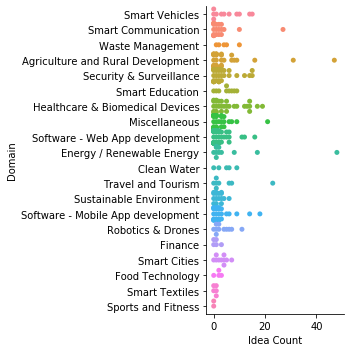

In [9]:
import seaborn as sns

#domain-wise analysis
g1 = sns.catplot(x = "Idea Count",y = "Domain",kind = "swarm",data = df)
g1.savefig("domain-wise.png")

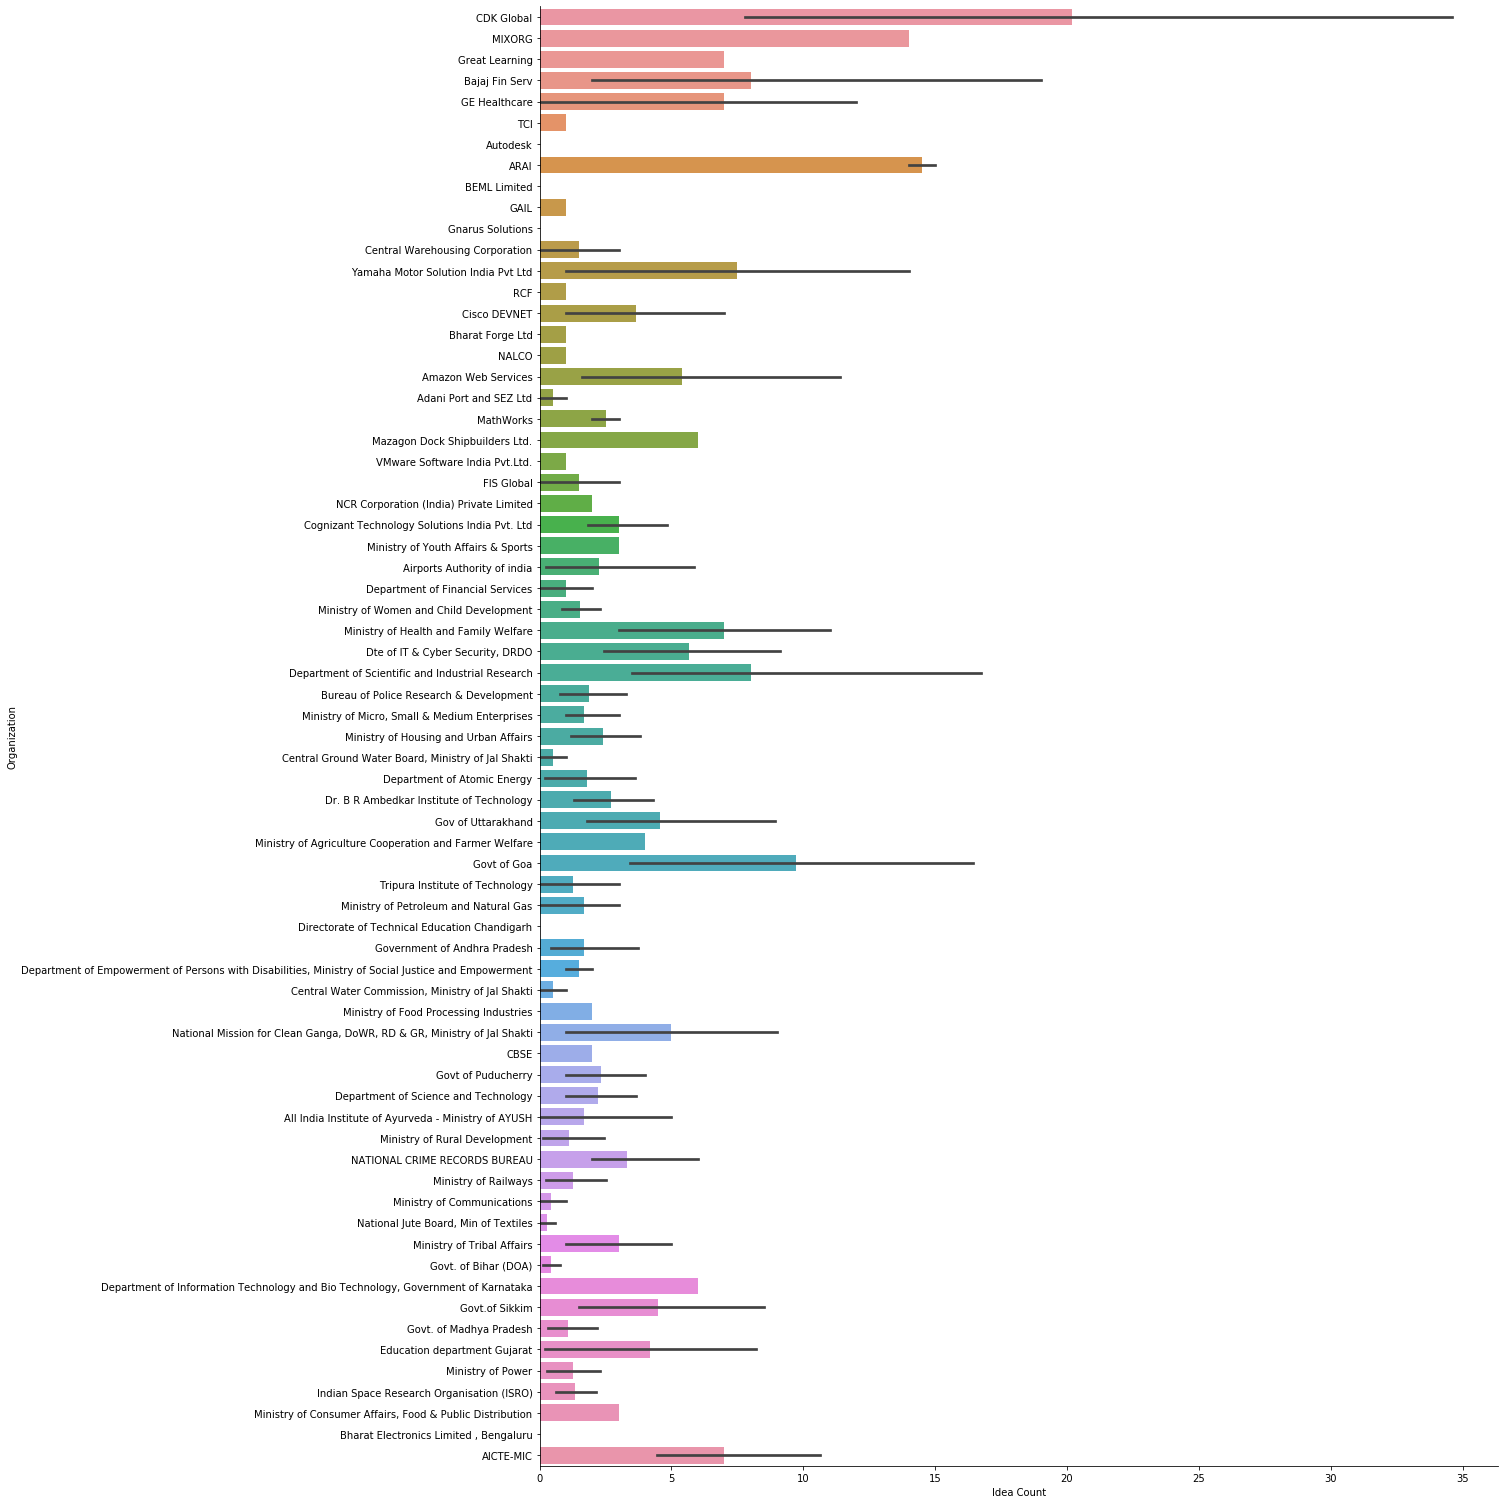

In [10]:
#organization-wise analysis
g2 = sns.catplot(x = "Idea Count",y = "Organization",kind = "bar",data = df,height=21)
g2.savefig("organization-wise.png")